In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import VotingClassifier
from scipy.stats import loguniform
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
data = pd.read_csv('CVD.csv')

In [3]:
df=data

In [4]:
for i in df.columns:
    print(i)

General_Health
Checkup
Exercise
Heart_Disease
Skin_Cancer
Other_Cancer
Depression
Diabetes
Arthritis
Sex
Age_Category
Height_(cm)
Weight_(kg)
BMI
Smoking_History
Alcohol_Consumption
Fruit_Consumption
Green_Vegetables_Consumption
FriedPotato_Consumption


In [5]:
df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


Now, from below we can check that there are no null values in the dataframe.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

### There are no no null values in the dataset. Also, there are 12 catogerical features and 7 numerical features.

In [7]:
# finding if there are any duplicate rows in the data
duplicated_mask= df.duplicated()
duplicates=df[duplicated_mask]
# print(type(duplicates))
print("shape of duplicate rows and columns", duplicates.shape)
# df.drop_duplicates()
print("duplicate rows have not been dropped because They are instances of the data collected from studies where more than one instance can exist of the same type of data")

shape of duplicate rows and columns (80, 19)
duplicate rows have not been dropped because They are instances of the data collected from studies where more than one instance can exist of the same type of data


In [8]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [9]:
# numerical_features = df.select_dtypes(include=['int64', 'float64'])

# fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 4))

# # Loop through the numerical features and create histograms
# for i, feature in enumerate(numerical_features):
#     df[feature].plot(kind='hist', ax=axes[i], title=feature)
#     axes[i].set_xlabel(feature)

# plt.show()

In [10]:
# sns.set()
# sns.pairplot(data , hue="Heart_Disease")
# plt.show()

### ENCODING DATA

In [11]:
catogerical_features = ['General_Health','Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Age_Category','Smoking_History']

In [12]:
for i in catogerical_features:
#     print( "feature -  " , i )
    print()
    print(data[i].value_counts())
    print()


Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64


Yes    239381
No      69473
Name: Exercise, dtype: int64


No     283883
Yes     24971
Name: Heart_Disease, dtype: int64


No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64


No     278976
Yes     29878
Name: Other_Cancer, dtype: int64


No     246953
Yes     61901
Name: Depression, dtype: int64


No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64


No     207783
Yes    101071
Name: Arthritis, dtype: int64


Female    160196
Male      148658
Name: Sex, dtype: int64


65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    1

Here, <b>General_Health</b> has <b> ordinal values</b> refer to data that has a specific order or ranking but doesn't have an equal interval between values. for eg- "Good" "Very Good" and "Excelent" represent ordinal data because they imply an order, but the health difference between "Good" and "Very Good" doesn't necessarily match the difference between "Very Good" and "Excelent".
Inferences- 
1. General_Health has 5 types and has ordinal values so we need to label encode so that the ordinal information is preserved.
2. Diabetes where 'No, pre-diabetes or borderline diabetes' and 'Yes, but female told only during pregnancy' is there, we can now either delete this rows or do consider it 'Yes' or 'No' respectively.
3. Sex has 'Male' or 'Female'.
4. Age_Category shows the Age Range of Patient.
5. Other columns have either 'Yes' or 'No' as values

Now, encoding all these features

In [13]:
# columns with yes, no values that neet to be encoded
cols_prep = ['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Arthritis','Smoking_History'] 

In [14]:
data[cols_prep] = data[cols_prep].replace({
    'Yes':1,
    'No':0
})

data[cols_prep]

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Smoking_History
0,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
308849,1,0,0,0,0,0,0
308850,1,0,0,0,0,0,0
308851,1,0,0,0,1,0,1
308852,1,0,0,0,0,0,0


In [15]:
data['General_Health'] = data['General_Health'].replace({
    'Very Good':5,
    'Good':4,
    'Excellent':3,
    'Fair':2,
    'Poor':1
})

In [16]:
data['General_Health'].value_counts()

5    110395
4     95364
3     55954
2     35810
1     11331
Name: General_Health, dtype: int64

In [17]:
data['Sex'] = data['Sex'].replace({
    'Male':0,
    'Female':1
})

In [18]:
data['Sex'].value_counts()

1    160196
0    148658
Name: Sex, dtype: int64

In [19]:
data['Checkup'].value_counts()

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

In [20]:
data['Checkup'] = data['Checkup'].replace({
    'Never':0,
    'Within the past year':1,
    'Within the past 2 years':2,
    'Within the past 5 years':3,
    '5 or more years ago':4
})

data['Checkup'].value_counts()

1    239371
2     37213
3     17442
4     13421
0      1407
Name: Checkup, dtype: int64

In [21]:
data['Age_Category'].value_counts()

65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: Age_Category, dtype: int64

In [22]:
data['Age_Category'] = data['Age_Category'].replace({
    '80+':'80-100'
})

In [23]:
new_columns = data['Age_Category'].str.split('-', expand=True) #splits the column into two columns in a separate dataframe new_columns
# print(new_columns)
new_columns.columns = ['Age_min','Age_max'] #renaming the columns
new_columns = new_columns.astype(int)
data = pd.concat([data, new_columns], axis=1)
data = data.drop(['Age_Category'], axis=1)
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_min,Age_max
0,1,2,0,0,0,0,0,No,1,1,150,32.66,14.54,1,0,30,16,12,70,74
1,5,1,0,1,0,0,0,Yes,0,1,165,77.11,28.29,0,0,30,0,4,70,74
2,5,1,1,0,0,0,0,Yes,0,1,163,88.45,33.47,0,4,12,3,16,60,64
3,1,1,1,1,0,0,0,Yes,0,0,180,93.44,28.73,0,0,30,30,8,75,79
4,4,1,0,0,0,0,0,No,0,0,191,88.45,24.37,1,0,8,4,0,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,5,1,1,0,0,0,0,No,0,0,168,81.65,29.05,0,4,30,8,0,25,29
308850,2,3,1,0,0,0,0,Yes,0,0,180,69.85,21.48,0,8,15,60,4,65,69
308851,5,4,1,0,0,0,1,"Yes, but female told only during pregnancy",0,1,157,61.23,24.69,1,4,40,8,4,30,34
308852,5,1,1,0,0,0,0,No,0,0,183,79.38,23.73,0,3,30,12,0,65,69


In [24]:
data['Diabetes'].value_counts()

No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64

In [25]:
# we will create two databases where the person doesnt really has diabetes but is either pre-diabetes or a female during pregnancy 
# as the results maybe different for a heart disease in these cases

# data_no_abnormal_diabetes dataframe only considers the data with values for simple Yes or No
data_no_abnormal_diabetes=data.copy()
# only takes rows with values for Diabetes as yes or no, removes all the rows with abnormal value for diabetes
data_no_abnormal_diabetes = data_no_abnormal_diabetes[~data_no_abnormal_diabetes['Diabetes'].isin(['No, pre-diabetes or borderline diabetes','Yes, but female told only during pregnancy'])]

print('Before')
display(data_no_abnormal_diabetes['Diabetes'].value_counts())

# Encoding
data_no_abnormal_diabetes['Diabetes'] = data_no_abnormal_diabetes['Diabetes'].replace({
    'Yes':1,
    'No':0
})
data_no_abnormal_diabetes['Diabetes'].value_counts()

Before


No     259141
Yes     40171
Name: Diabetes, dtype: int64

0    259141
1     40171
Name: Diabetes, dtype: int64

In [26]:
# data after taking into consideration the abnormal value for diabetes('Yes, but female told only during pregnancy' ,
# 'No, pre-diabetes or borderline diabetes')
data_abnormal_diabetes = data.copy()
data_abnormal_diabetes['Diabetes'] = data_abnormal_diabetes['Diabetes'].replace({
    'Yes, but female told only during pregnancy':1,
    'No, pre-diabetes or borderline diabetes':0,
    'Yes':1,
    'No':0
})

data_abnormal_diabetes['Diabetes'].value_counts()

0    266037
1     42817
Name: Diabetes, dtype: int64

Now, we have two datasets one in which we consider the values for diabetes ( 'Yes, but female told only during pregnancy' , 'No, pre-diabetes or borderline diabetes' ) and the other where we drop these values for the diabetes feature.

In [27]:
data_no_abnormal_diabetes.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_min,Age_max
0,1,2,0,0,0,0,0,0,1,1,150,32.66,14.54,1,0,30,16,12,70,74
1,5,1,0,1,0,0,0,1,0,1,165,77.11,28.29,0,0,30,0,4,70,74
2,5,1,1,0,0,0,0,1,0,1,163,88.45,33.47,0,4,12,3,16,60,64
3,1,1,1,1,0,0,0,1,0,0,180,93.44,28.73,0,0,30,30,8,75,79
4,4,1,0,0,0,0,0,0,0,0,191,88.45,24.37,1,0,8,4,0,80,100


In [28]:
data_abnormal_diabetes.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_min,Age_max
0,1,2,0,0,0,0,0,0,1,1,150,32.66,14.54,1,0,30,16,12,70,74
1,5,1,0,1,0,0,0,1,0,1,165,77.11,28.29,0,0,30,0,4,70,74
2,5,1,1,0,0,0,0,1,0,1,163,88.45,33.47,0,4,12,3,16,60,64
3,1,1,1,1,0,0,0,1,0,0,180,93.44,28.73,0,0,30,30,8,75,79
4,4,1,0,0,0,0,0,0,0,0,191,88.45,24.37,1,0,8,4,0,80,100


## Exploratory Data Analysis

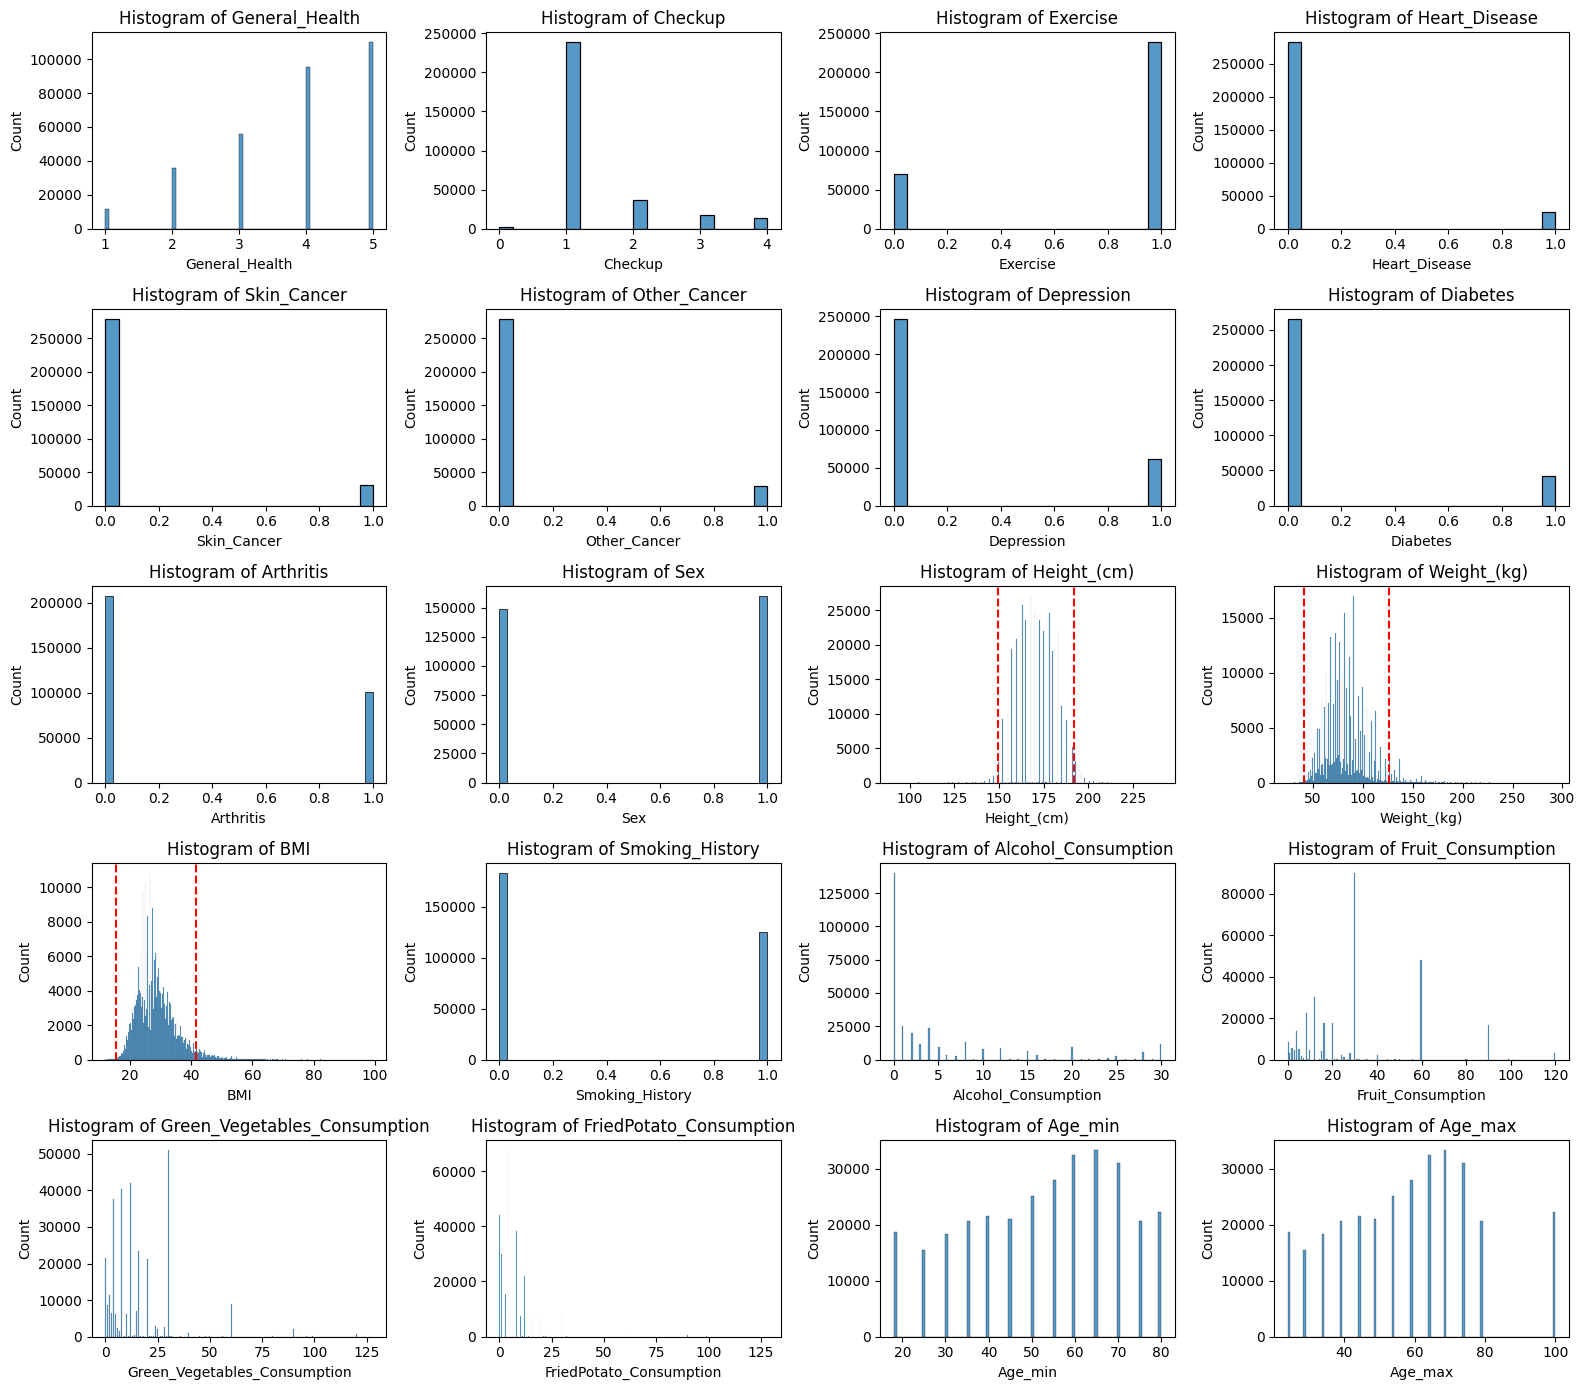

In [29]:
fig, axes = plt.subplots(5, 4, figsize=(16, 14))
# This line creates a figure (fig) with a grid of subplots organized in a 4x5 matrix. 
# axes is a 2D array containing references to each subplot.
# 
for col, ax in zip(data_abnormal_diabetes, axes.flatten()):
    
    if col in ['Height_(cm)', 'Weight_(kg)', 'BMI']:
        mean = data_abnormal_diabetes[col].mean()
        std = data_abnormal_diabetes[col].std()
        # Computes the lower bound and upper bound for potential outliers (mean - 2 * standard deviations).
        lower_bound = mean - 2 * std
        upper_bound = mean + 2 * std

        # plots a vertical line for the lower bound and upper bound for potential outliers.
        ax.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
        ax.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')
    
    # Plot histogram in the current subplot
    sns.histplot(data=data_abnormal_diabetes, ax=ax, x=col)
    
    # Set labels and title for the current subplot
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {col}')
#     ax.legend()

# Adjusts the spacing between subplots to prevent overlapping and improve layout.
plt.tight_layout()
plt.show()

In [30]:
# in order to remove the outliers in height, weight, BMI features
data_train_normal = data_no_abnormal_diabetes.copy()
data_train_abnormal = data_abnormal_diabetes.copy() 
    
lower_percentile = 5
upper_percentile = 95

# Perform quantile capping on data_train_dia
lower_bound_normal= data_train_normal[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(lower_percentile/100)
upper_bound_normal = data_train_normal[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(upper_percentile/100)
data_train_normal[['Height_(cm)', 'Weight_(kg)', 'BMI']] = data_train_normal[['Height_(cm)', 'Weight_(kg)', 'BMI']].clip(lower_bound_normal, upper_bound_normal, axis=1)

# Perform quantile capping on data_train_no_dia
lower_bound_abnormal = data_train_abnormal[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(lower_percentile/100)
upper_bound_abnormal = data_train_abnormal[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(upper_percentile/100)
data_train_abnormal[['Height_(cm)', 'Weight_(kg)', 'BMI']] = data_train_abnormal[['Height_(cm)', 'Weight_(kg)', 'BMI']].clip(lower_bound_abnormal, upper_bound_abnormal, axis=1)

## KdePlots

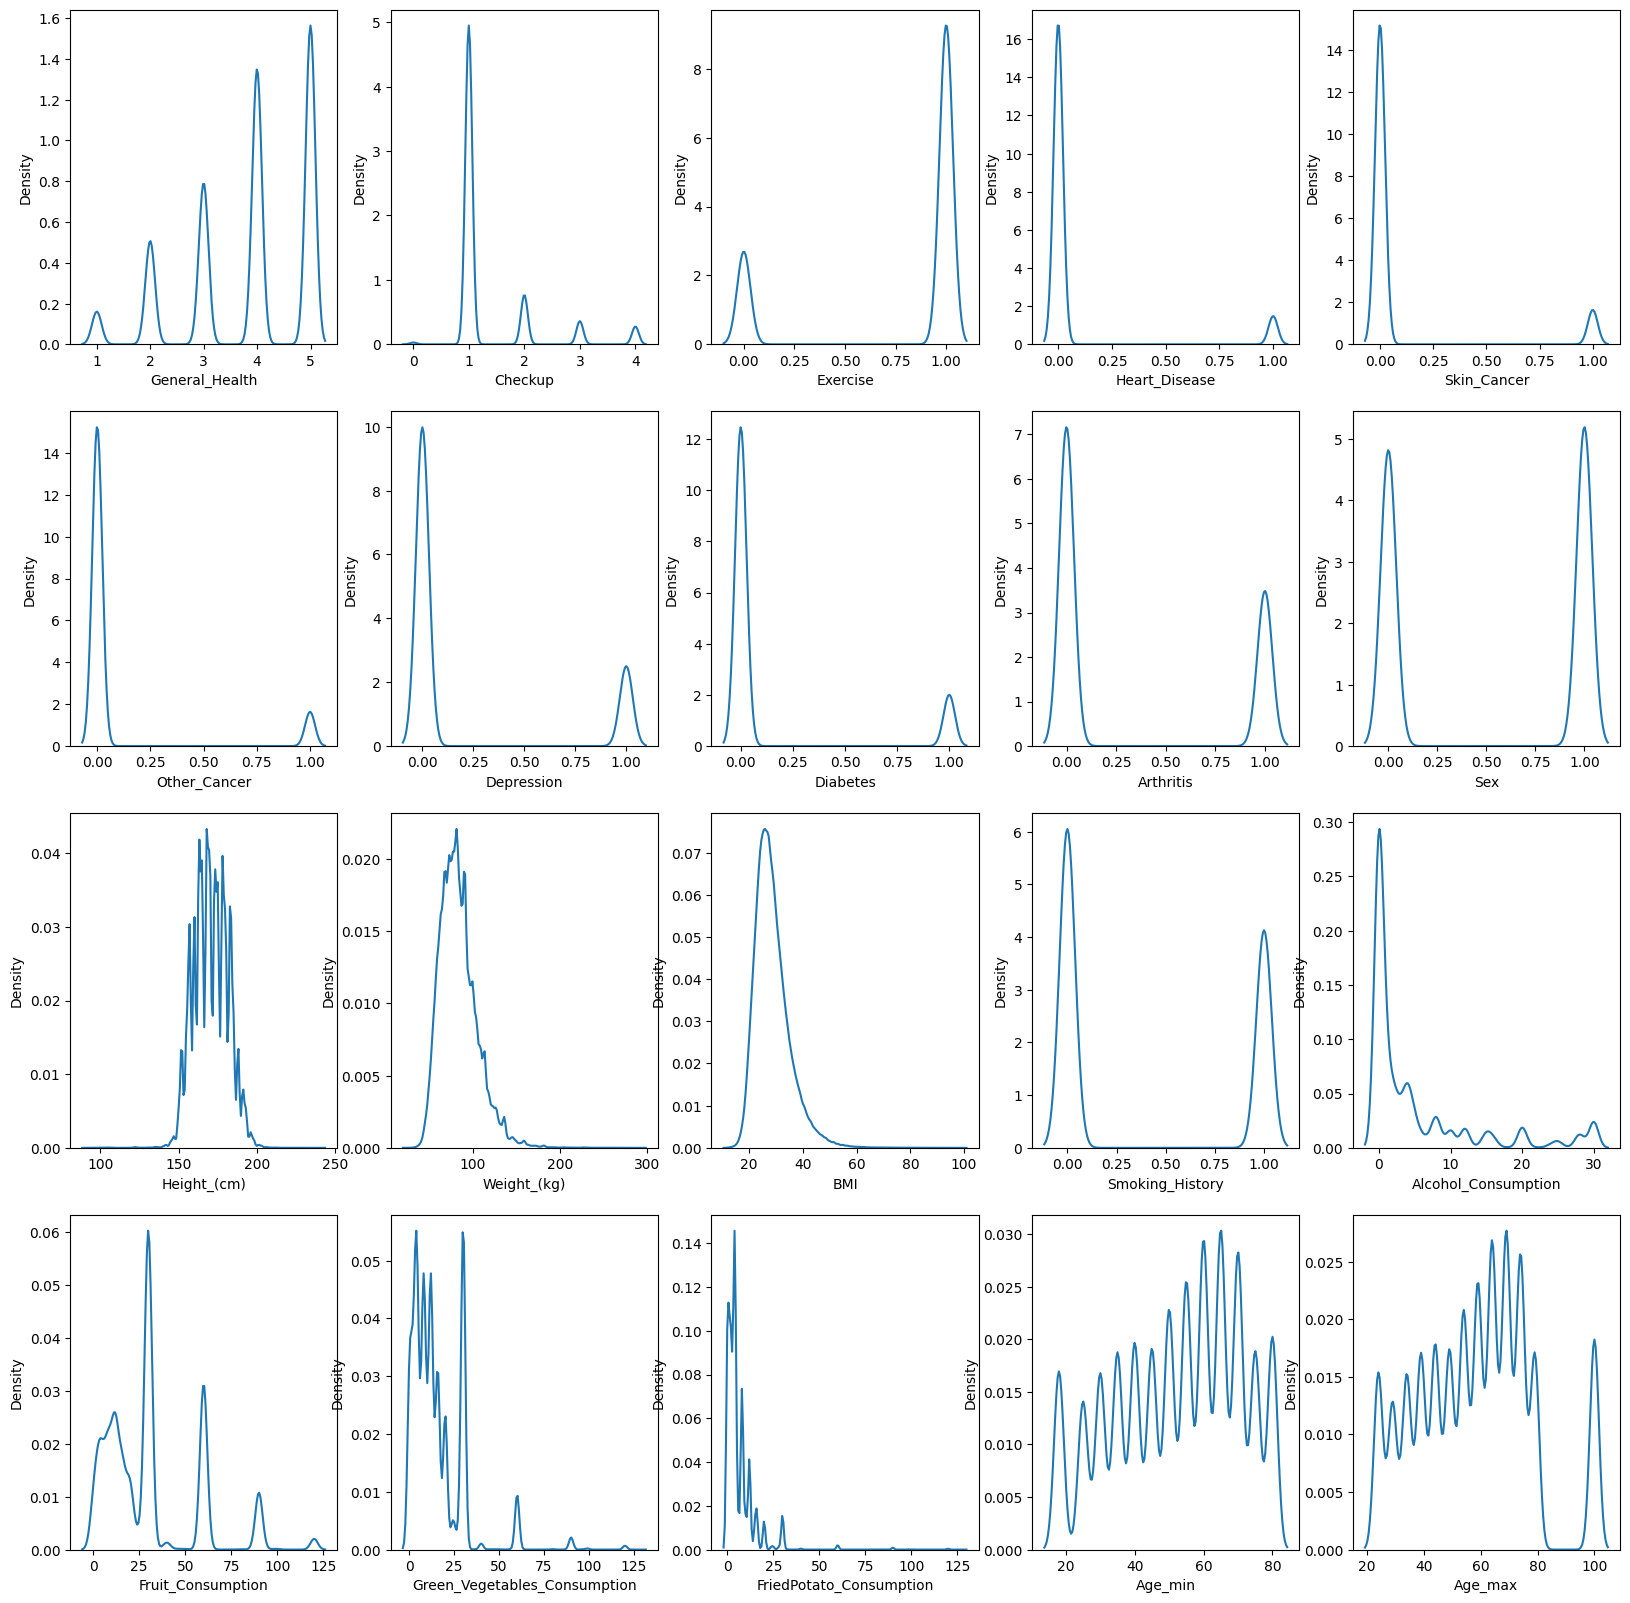

In [31]:
fig, axes = plt.subplots(4, 5, figsize=(20,20))

for col, ax in zip(data_abnormal_diabetes, axes.flatten()):
    sns.kdeplot(data=data_abnormal_diabetes, ax=ax, x=col)

## Box Plot for numerical features

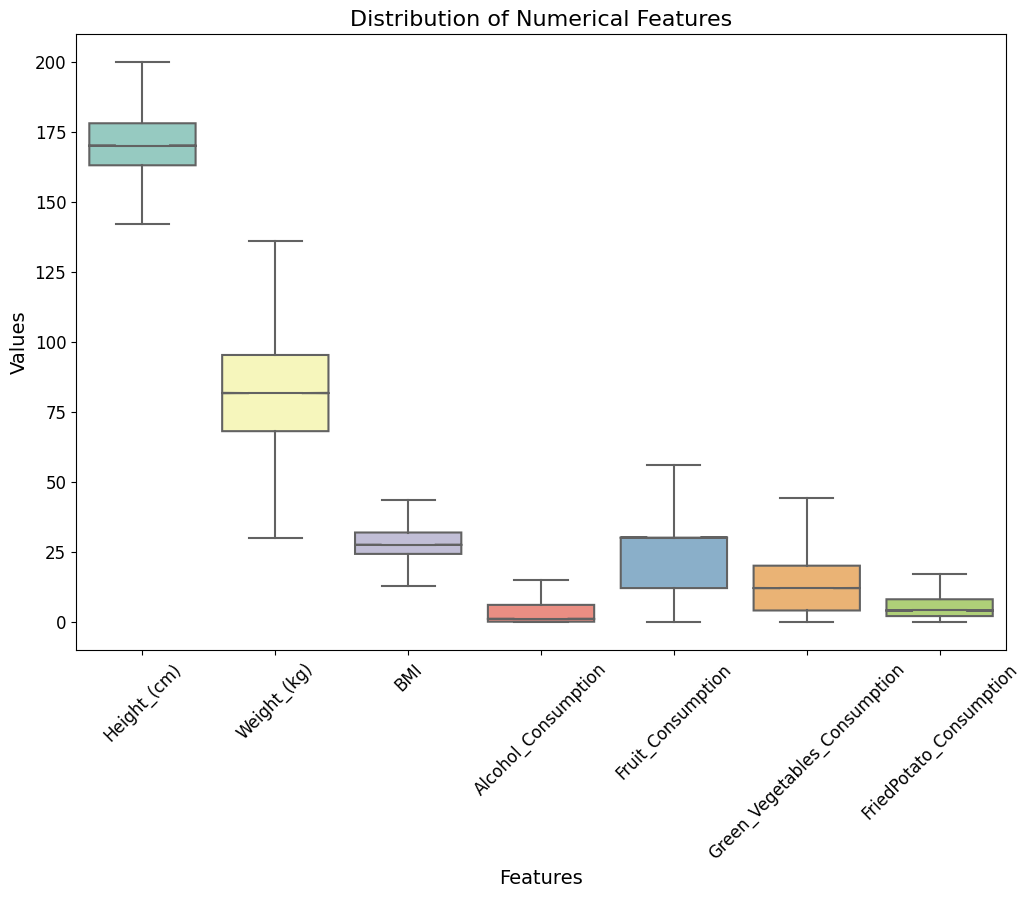

In [32]:
cols_numerical = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
data__ = data[cols_numerical]

# Set color palette
sns.set_palette("husl")

plt.figure(figsize=(12, 8))

# Create a box plot with adjustments
sns.boxplot(data=data__, orient="v", palette="Set3", notch=True, showfliers=False, dodge=True, saturation=0.75)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of Numerical Features", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.show()

## Heatmaps for collinearity analysis

Text(0.5, 1.0, 'Without abnormal diabetes')

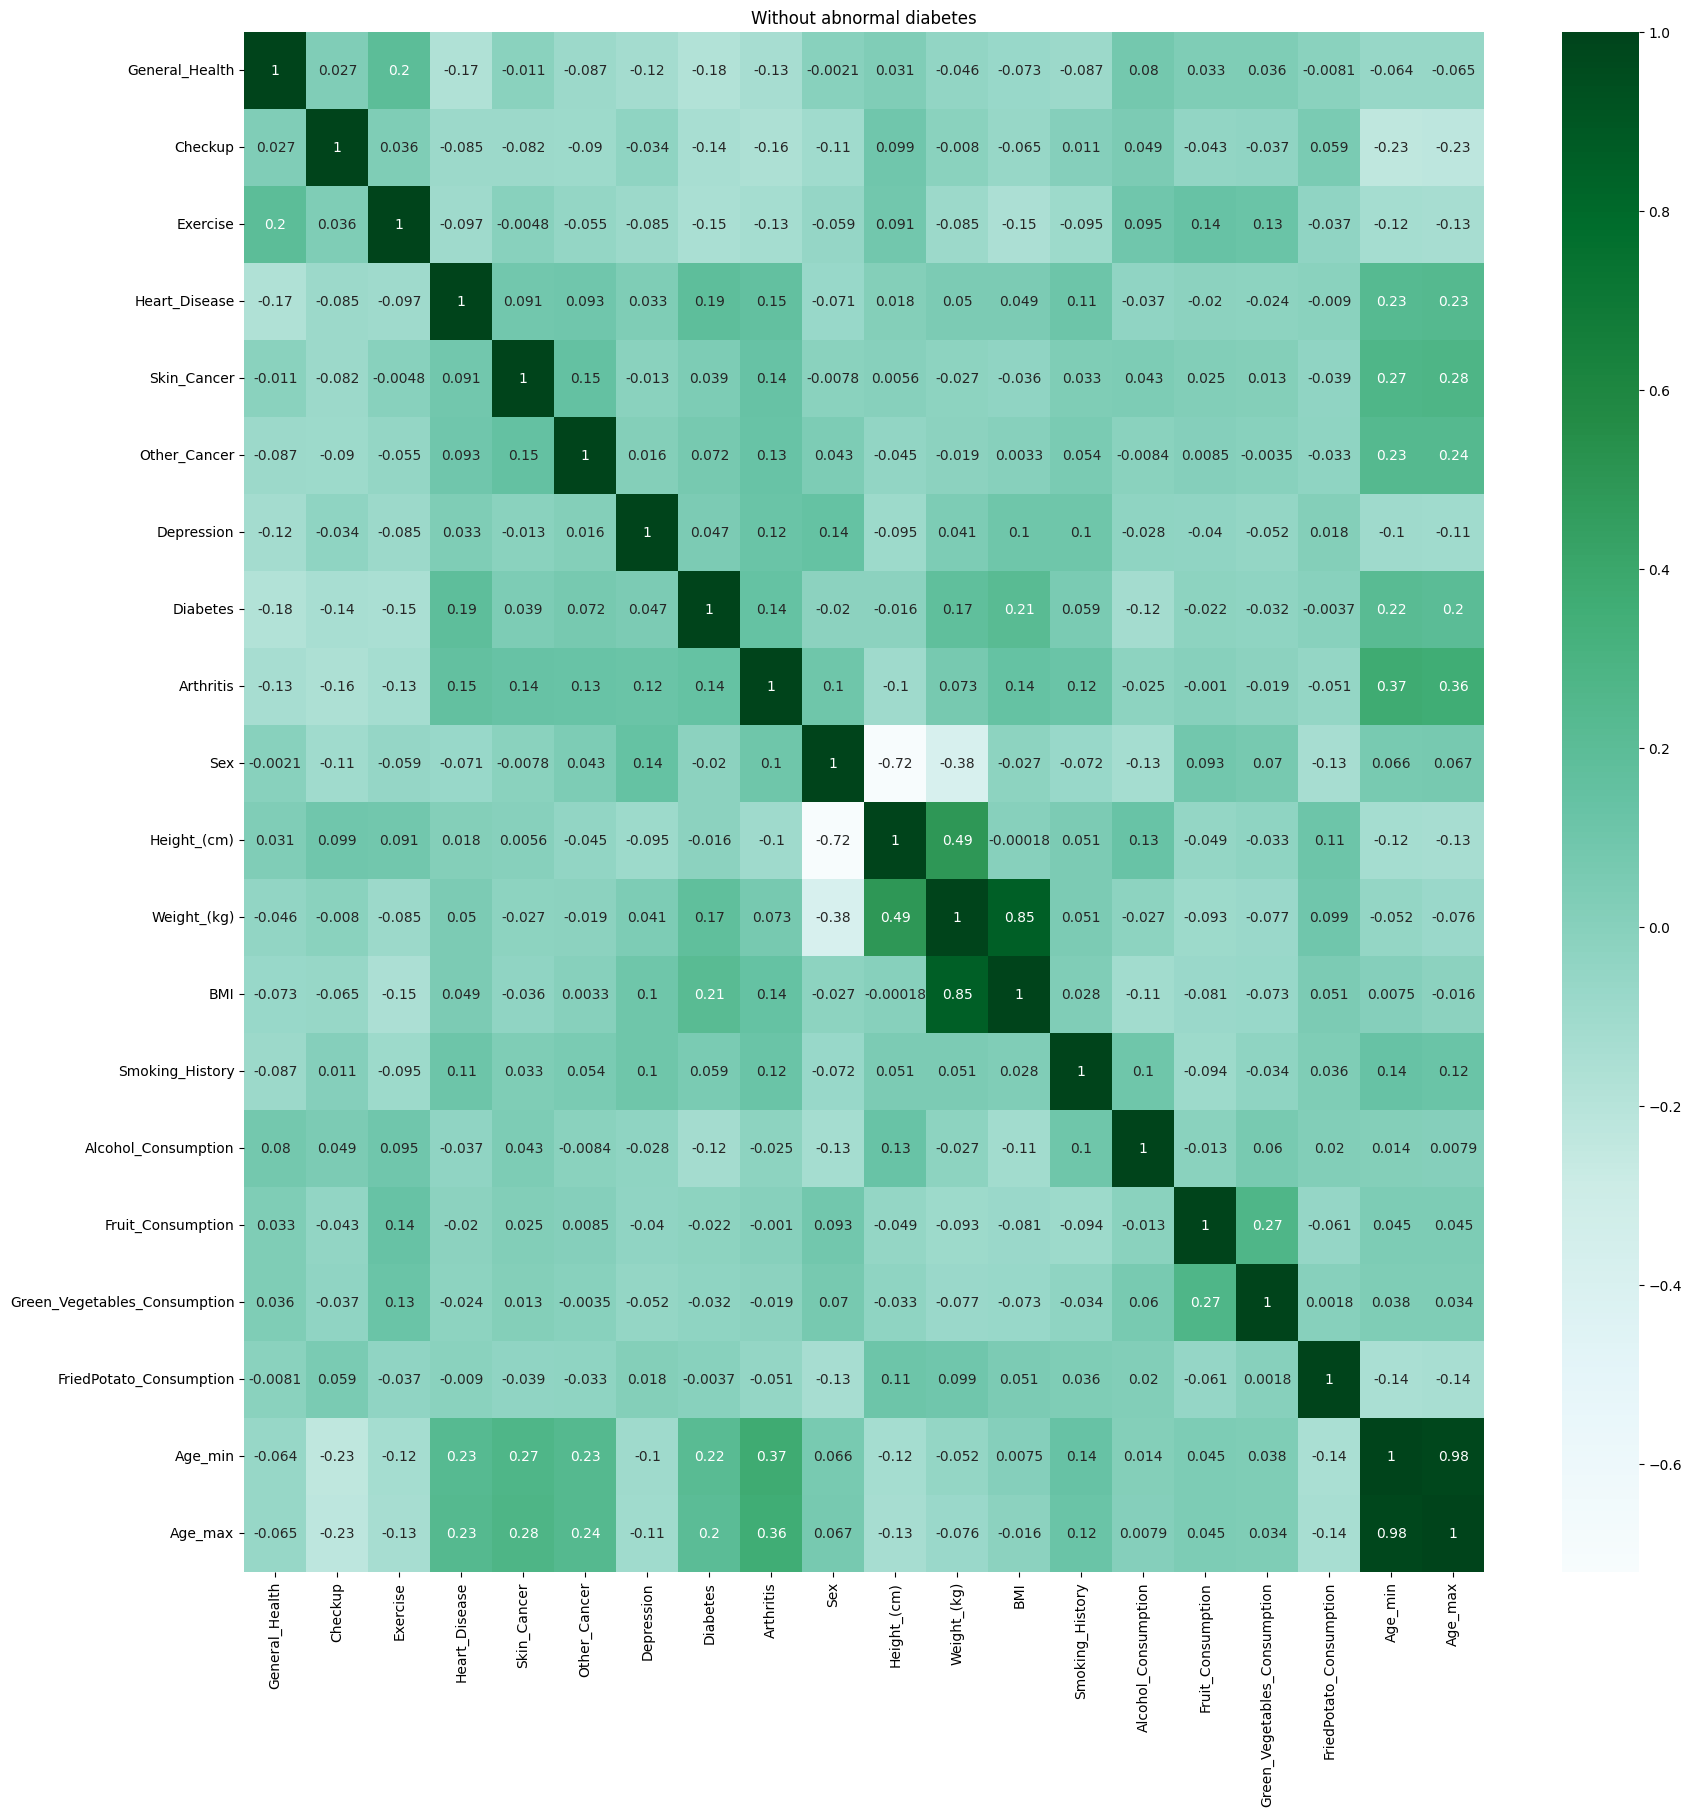

In [33]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))
data_corr_no_dia = data_train_normal.corr()
sns.heatmap(
    data=data_corr_no_dia,
    cmap='BuGn',
    annot=True,
    ax=axes
)
plt.title('Without abnormal diabetes')

Text(0.5, 1.0, 'With abnormal diabetes')

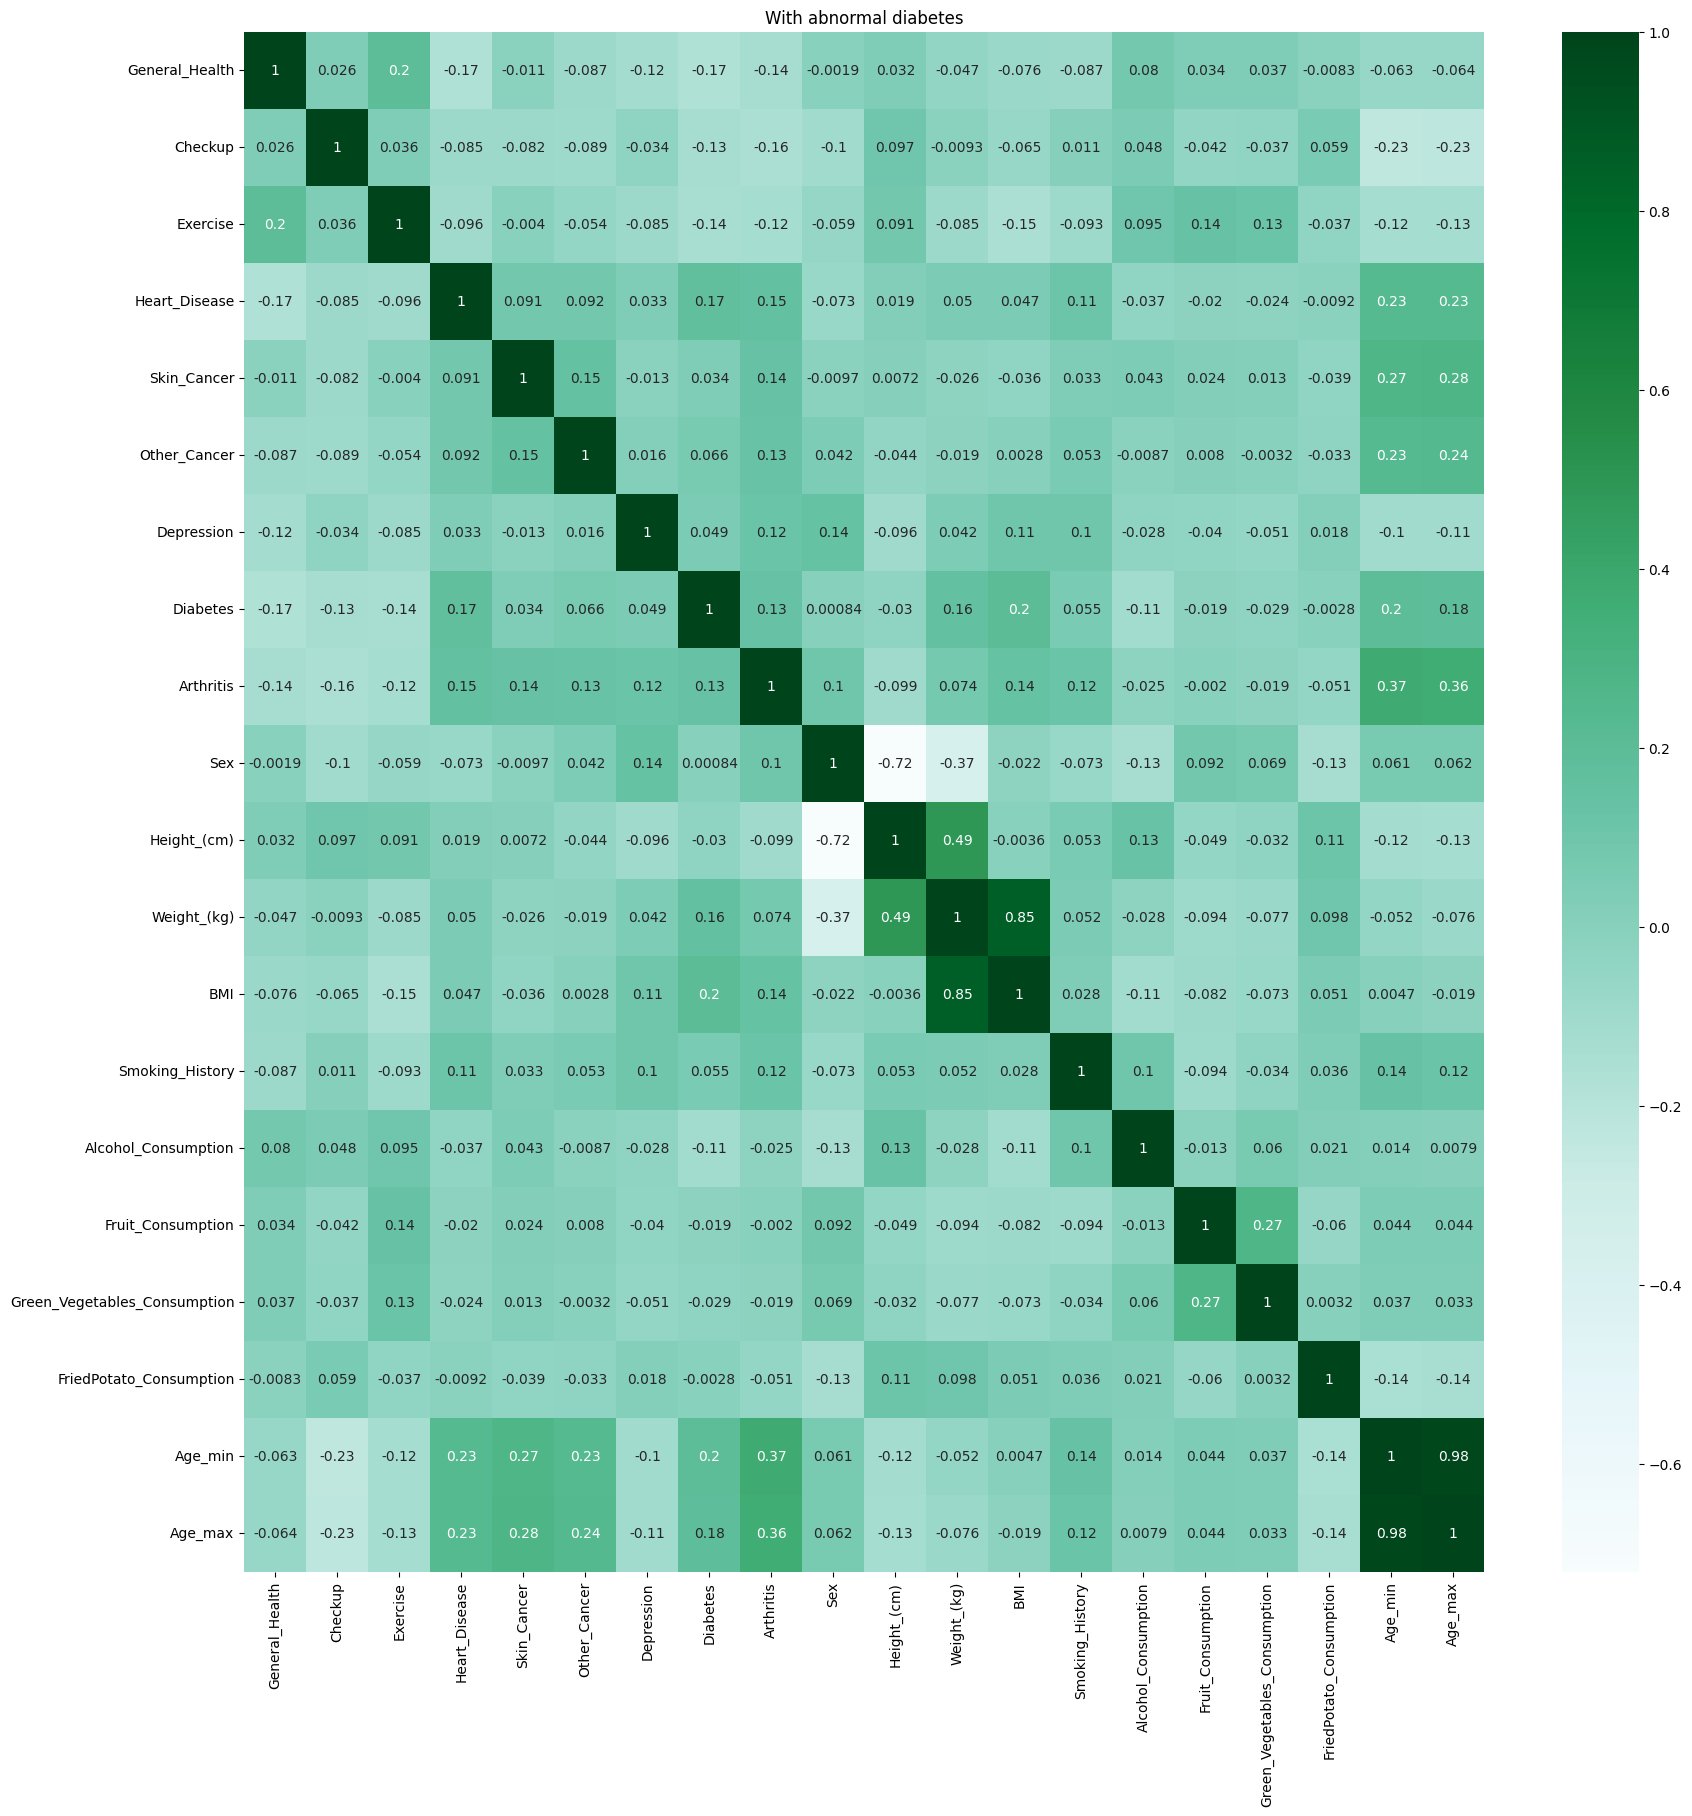

In [34]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))
data_corr_dia = data_train_abnormal.corr()
sns.heatmap(
    data=data_corr_dia,
    cmap='BuGn',
    annot=True,
    ax=axes
)
plt.title('With abnormal diabetes')

### we have two datasets-
1. data_train_normal - no outliers, without abnormal diabetes data
2. data_train_abnormal - no outliers, with abnormal diabetes data

## feature selection

In [35]:
# feature selection using selectKbest method
data1=data_train_normal.copy()
data2=data_train_abnormal.copy()

In [36]:
# finding and removing highly corelated features by corelation matrix'x help
columns= data_train_normal.columns
print(columns)

correlation_matrix = data1.corr()
threshold = 0.8

# Finding pairs of highly correlated features

high_corr_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((i, j))

print()
print(high_corr_pairs)

# removing highly correlated pairs
data1 = data1.drop(columns=["BMI" , "Age_max"])
data2 = data2.drop(columns=["BMI" , "Age_max"])

print(data1.columns)
print(data2.columns)

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Age_min',
       'Age_max'],
      dtype='object')

[(11, 12), (18, 19)]
Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Height_(cm)', 'Weight_(kg)', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'Age_min'],
      dtype='object')
Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Height_(cm)', 'Weight_(kg)', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit

In [38]:
X = data1.drop(['Heart_Disease'], axis=1)
y = data1['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

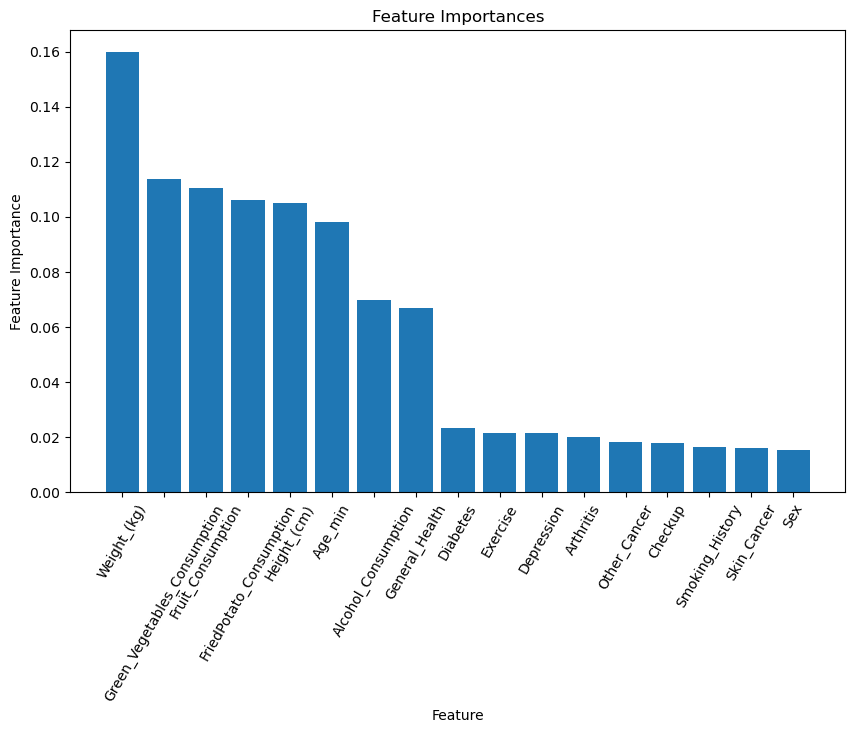

In [37]:
# using SelectFromModel method to get the importance rankings of each feauture with importance values in context to 
# the target feautre to predict
base_estimator = RandomForestClassifier()

sfm = SelectFromModel(base_estimator)

X_train_sfm = sfm.fit_transform(X_train, y_train)

gb_model = sfm.estimator_

feature_importances = gb_model.feature_importances_
ranking = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[ranking], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[ranking], rotation=60)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

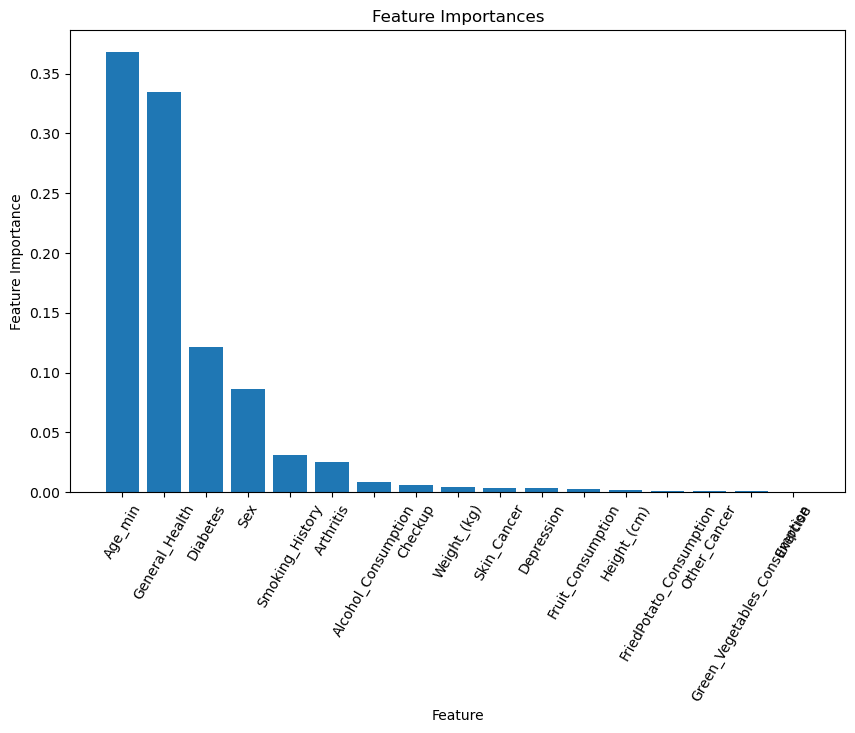

In [38]:
# using gradient Boosting model to get the importance value of features with respect to prediction model
base_estimator = GradientBoostingClassifier()

sfm = SelectFromModel(base_estimator)

X_train_sfm = sfm.fit_transform(X_train, y_train)

gb_model = sfm.estimator_

feature_importances = gb_model.feature_importances_
ranking = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[ranking], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[ranking], rotation=60)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

Model Differences:
RandomForest and Gradient Boosting are different types of models with distinct ways of making predictions. RandomForest relies on a collection of decision trees, while Gradient Boosting builds trees sequentially, with each tree correcting the errors of the previous ones. The models may prioritize different features based on their internal mechanisms.

Model Sensitivity to Feature Relationships:
The two models might have different sensitivities to feature relationships and interactions. RandomForest, being an ensemble of decision trees, might be more sensitive to individual feature importance, while Gradient Boosting might capture complex interactions among features.

In [40]:
def model_train(data):
    X = data.drop(['Heart_Disease'], axis=1)
    y = data['Heart_Disease']


    models = {
        'LogisticRegression' : LogisticRegression(solver='liblinear', max_iter=1000),
        'RandomForestClassifier': RandomForestClassifier() ,
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        'KNeighborsClassifier': KNeighborsClassifier(),
    }


    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    fold_scores = []

    for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
        # training data index and validation data index
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]

        fold_scores_itr = []

        print('='*70)
        for model_name, model in models.items():
            
            model.fit(X_fold_train, y_fold_train)
            
            fold_probs = model.predict(X_fold_val)

            fold_accuracy = accuracy_score(y_fold_val, fold_probs)

            fold_scores.append((model_name, fold_idx, fold_accuracy))

            fold_scores_itr.append(fold_accuracy)

            print(f"FOLD {fold_idx} ==> {model_name} ==> ACC == {fold_accuracy}")

        print('-'*70)
        print(f'Mean ACC of FOLD {fold_idx} ==> ACC == {np.mean(fold_scores_itr)}')
                                   
    return fold_scores


In [130]:
print("##### Using Data with normal Diabetes #####")
fold_scores_dia = model_train(data1)

##### Using Data with normal Diabetes #####
FOLD 0 ==> LogisticRegression ==> ACC == 0.9196665720060806
FOLD 0 ==> RandomForestClassifier ==> ACC == 0.9185640545913168
FOLD 0 ==> DecisionTreeClassifier ==> ACC == 0.8626029433874012
FOLD 0 ==> KNeighborsClassifier ==> ACC == 0.9117986068189031
----------------------------------------------------------------------
Mean ACC of FOLD 0 ==> ACC == 0.9031580442009254
FOLD 1 ==> LogisticRegression ==> ACC == 0.9201176018575747
FOLD 1 ==> RandomForestClassifier ==> ACC == 0.9187311026844629
FOLD 1 ==> DecisionTreeClassifier ==> ACC == 0.8623690760569969
FOLD 1 ==> KNeighborsClassifier ==> ACC == 0.9112139384928921
----------------------------------------------------------------------
Mean ACC of FOLD 1 ==> ACC == 0.9031079297729816
FOLD 2 ==> LogisticRegression ==> ACC == 0.9193812435267783
FOLD 2 ==> RandomForestClassifier ==> ACC == 0.918829975610571
FOLD 2 ==> DecisionTreeClassifier ==> ACC == 0.861748688650563
FOLD 2 ==> KNeighborsClassifie

In [131]:
print("##### Using Data with abnormal Diabetes #####")
fold_scores_no_dia = model_train(data2)

##### Using Data with abnormal Diabetes #####
FOLD 0 ==> LogisticRegression ==> ACC == 0.9187320911107154
FOLD 0 ==> RandomForestClassifier ==> ACC == 0.9180197827459488
FOLD 0 ==> DecisionTreeClassifier ==> ACC == 0.8596266856615564
FOLD 0 ==> KNeighborsClassifier ==> ACC == 0.9108481326188664
----------------------------------------------------------------------
Mean ACC of FOLD 0 ==> ACC == 0.9018066730342718
FOLD 1 ==> LogisticRegression ==> ACC == 0.9189101682019071
FOLD 1 ==> RandomForestClassifier ==> ACC == 0.9182302374900844
FOLD 1 ==> DecisionTreeClassifier ==> ACC == 0.8617312331029123
FOLD 1 ==> KNeighborsClassifier ==> ACC == 0.9117385180748248
----------------------------------------------------------------------
Mean ACC of FOLD 1 ==> ACC == 0.902652539217432
FOLD 2 ==> LogisticRegression ==> ACC == 0.9187644687636594
FOLD 2 ==> RandomForestClassifier ==> ACC == 0.9180521603988927
FOLD 2 ==> DecisionTreeClassifier ==> ACC == 0.8599180845380519
FOLD 2 ==> KNeighborsClassi

In [ ]:
# !!pip install xgboost

In [43]:
# applying gradient boosting classifier

def model_train(data):
    X = data.drop(['Heart_Disease'], axis=1)
    y = data['Heart_Disease']

    models = {
        'GradientBoostingClassifier': GradientBoostingClassifier()
#         'XGBClassifier': XGBClassifier(),
    }
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]

        fold_scores_itr = []

        print('=' * 70)
        for model_name, model in models.items():
            model.fit(X_fold_train, y_fold_train)
            fold_probs = model.predict(X_fold_val)
            fold_accuracy = accuracy_score(y_fold_val, fold_probs)
            fold_scores_itr.append(fold_accuracy)
            print(f"FOLD {fold_idx} ==> {model_name} ==> ACC == {fold_accuracy}")

        print('-' * 70)
        mean_fold_accuracy = np.mean(fold_scores_itr)
        print(f'Mean ACC of FOLD {fold_idx} ==> ACC == {mean_fold_accuracy}')

    return None 

In [44]:
fold_scores_dia = model_train(data1)

FOLD 0 ==> GradientBoostingClassifier ==> ACC == 0.9197863106513917
----------------------------------------------------------------------
Mean ACC of FOLD 0 ==> ACC == 0.9197863106513917
FOLD 1 ==> GradientBoostingClassifier ==> ACC == 0.9201170680859168
----------------------------------------------------------------------
Mean ACC of FOLD 1 ==> ACC == 0.9201170680859168
FOLD 2 ==> GradientBoostingClassifier ==> ACC == 0.9199959907787912
----------------------------------------------------------------------
Mean ACC of FOLD 2 ==> ACC == 0.9199959907787912


In [45]:
fold_scores_no_dia = model_train(data2)

FOLD 0 ==> GradientBoostingClassifier ==> ACC == 0.9194381847851426
----------------------------------------------------------------------
Mean ACC of FOLD 0 ==> ACC == 0.9194381847851426
FOLD 1 ==> GradientBoostingClassifier ==> ACC == 0.9194471156181095
----------------------------------------------------------------------
Mean ACC of FOLD 1 ==> ACC == 0.9194471156181095
FOLD 2 ==> GradientBoostingClassifier ==> ACC == 0.9196510961525386
----------------------------------------------------------------------
Mean ACC of FOLD 2 ==> ACC == 0.9196510961525386


In [58]:
# applying RandomizedSearchCV on logisticRegression

X = data1.drop(['Heart_Disease'], axis=1)
y = data1['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'penalty': [ 'l2', 'none'],
    'C': loguniform(1e-4, 1e4),  # Using a log-uniform distribution for C
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs'],
    'max_iter': [500, 750 , 1000, 1250],
    'class_weight': [None, 'balanced']
}

logreg_model = LogisticRegression(random_state=42)

random_search = RandomizedSearchCV(estimator=logreg_model, param_distributions=param_dist, n_iter=15, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

y_pred = random_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the Test Set:", accuracy*100)

D:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Best Parameters: {'C': 0.09915644566638389, 'class_weight': None, 'fit_intercept': True, 'max_iter': 1000, 'penalty': 'none', 'solver': 'newton-cg'}
Accuracy on the Test Set: 92.10363663698779


In [46]:
# for grid search cv taking significant number of hyperparamters and seeeing 
# which parameter fits the best in the dataset and gives the best accuracy 

#  the parameter grid for GridSearchCV
param_grid = {
    'loss': ["exponential" , "log_loss"],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.8, 0.9],
}

In [39]:
# hyperparameter tuning for data1
X = data1.drop(['Heart_Disease'], axis=1)
y = data1['Heart_Disease']


# Defining the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'subsample': [0.8, 0.9],
}

# Created the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='accuracy' , n_jobs=-1)
grid_search.fit(X, y)
# Printing the best parameters
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df)
print("------------------------")
print("Best Parameters:", grid_search.best_params_)



   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      34.768403      0.074611         0.526589        0.075113   
1      59.596006      0.207320         0.285776        0.014508   
2      87.760458      9.376748         0.455750        0.042695   

  param_n_estimators                 params  split0_test_score  \
0                 50   {'n_estimators': 50}           0.920097   
1                100  {'n_estimators': 100}           0.919937   
2                200  {'n_estimators': 200}           0.919856   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.920157           0.919956         0.920070        0.000084   
1           0.920027           0.919956         0.919973        0.000039   
2           0.919846           0.920166         0.919956        0.000149   

   rank_test_score  
0                1  
1                2  
2                3  
------------------------
Best Parameters: {'n_estimators': 50}


In [40]:
param_grid = {
#     'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'subsample': [0.8, 0.9],
}

grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='accuracy' , n_jobs=-1)
grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df)
print("------------------------")
print("Best Parameters:", grid_search.best_params_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      66.679564      0.138075         0.312512        0.031705   
1      66.105311      0.223447         0.357201        0.010401   
2      53.902317     18.247269         0.291894        0.036441   

  param_learning_rate                    params  split0_test_score  \
0               0.001  {'learning_rate': 0.001}           0.919546   
1                0.01   {'learning_rate': 0.01}           0.919546   
2                 0.1    {'learning_rate': 0.1}           0.919937   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.919546           0.919545         0.919545    3.801392e-07   
1           0.919546           0.919545         0.919545    3.801392e-07   
2           0.920027           0.919956         0.919973    3.879187e-05   

   rank_test_score  
0                2  
1                2  
2                1  
------------------------
Best Parameters: {'learning_rate': 0

In [41]:

param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'subsample': [0.8, 0.9],
}
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='accuracy' , n_jobs=-1)
grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df)
print("------------------------")
print("Best Parameters:", grid_search.best_params_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      63.320095      0.130217         0.369673        0.020412   
1      80.768737      0.339461         0.376444        0.016034   
2      81.577477     17.336928         0.449040        0.043424   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               3  {'max_depth': 3}           0.919937           0.920027   
1               4  {'max_depth': 4}           0.919877           0.919816   
2               5  {'max_depth': 5}           0.919696           0.919887   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.919956         0.919973        0.000039                1  
1           0.919936         0.919876        0.000049                3  
2           0.920076         0.919886        0.000155                2  
------------------------
Best Parameters: {'max_depth': 3}


In [42]:
param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'subsample': [0.8, 0.9],
}

grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='accuracy' , n_jobs=-1)
grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df)
print("------------------------")
print("Best Parameters:", grid_search.best_params_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      69.786679      0.395656         0.364658        0.027628   
1      70.374234      0.644746         0.308792        0.047308   
2      56.835944     19.319991         0.281922        0.030548   

  param_min_samples_split                     params  split0_test_score  \
0                       2   {'min_samples_split': 2}           0.919937   
1                       5   {'min_samples_split': 5}           0.919937   
2                      10  {'min_samples_split': 10}           0.919937   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.920027           0.919956         0.919973        0.000039   
1           0.920027           0.919956         0.919973        0.000039   
2           0.920027           0.919956         0.919973        0.000039   

   rank_test_score  
0                1  
1                1  
2                1  
------------------------
Best Parameters:

In [43]:
param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'subsample': [0.8, 0.9],
}


grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df)
print("------------------------")
print("Best Parameters:", grid_search.best_params_)


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      67.672888      0.147863         0.321780        0.019009   
1      67.769696      0.208440         0.307207        0.031466   
2      53.405410     20.326631         0.273433        0.054611   

  param_min_samples_leaf                   params  split0_test_score  \
0                      1  {'min_samples_leaf': 1}           0.919937   
1                      2  {'min_samples_leaf': 2}           0.919917   
2                      4  {'min_samples_leaf': 4}           0.919917   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.920027           0.919956         0.919973        0.000039   
1           0.920027           0.919936         0.919960        0.000048   
2           0.920027           0.919936         0.919960        0.000048   

   rank_test_score  
0                1  
1                2  
2                2  
------------------------
Best Parameters: {'min_sampl

In [44]:
param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
#     'subsample': [0.8, 0.9],
}


grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df)
print("------------------------")
print("Best Parameters:", grid_search.best_params_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      26.416114      0.234588         0.390625        0.006414   
1      26.690606      0.107578         0.379237        0.029828   
2      44.888326      7.305301         0.318021        0.030618   

  param_max_features                    params  split0_test_score  \
0               sqrt  {'max_features': 'sqrt'}           0.919726   
1               log2  {'max_features': 'log2'}           0.920057   
2               None    {'max_features': None}           0.919937   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.920077           0.919956         0.919920        0.000145   
1           0.919927           0.919816         0.919933        0.000099   
2           0.920027           0.919956         0.919973        0.000039   

   rank_test_score  
0                3  
1                2  
2                1  
------------------------
Best Parameters: {'max_features': None}


In [45]:
param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
    'subsample': [0.8, 0.9],
}


grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df)
print("------------------------")
print("Best Parameters:", grid_search.best_params_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      40.555903      0.238902         0.291324        0.010937   
1      43.403252      0.061572         0.358325        0.004419   

  param_subsample              params  split0_test_score  split1_test_score  \
0             0.8  {'subsample': 0.8}           0.919706           0.920077   
1             0.9  {'subsample': 0.9}           0.919796           0.920037   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.920076         0.919953        0.000175                2  
1           0.920096         0.919976        0.000130                1  
------------------------
Best Parameters: {'subsample': 0.9}


In [46]:
param_grid = {
    'loss': ["exponential" , "log_loss"],
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'subsample': [0.8, 0.9],
}

grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='accuracy' , n_jobs=-1)
grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df)
print("------------------------")
print("Best Parameters:", grid_search.best_params_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_loss  \
0      47.389605      0.164073         0.258681        0.015460  exponential   
1      46.265367      0.332864         0.287823        0.008966     log_loss   

                    params  split0_test_score  split1_test_score  \
0  {'loss': 'exponential'}           0.919997           0.919987   
1     {'loss': 'log_loss'}           0.919937           0.920027   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.920136         0.920040        0.000068                1  
1           0.919956         0.919973        0.000039                2  
------------------------
Best Parameters: {'loss': 'exponential'}


In [58]:
# testing the dataset on the model used for gridsearch predictions

X = data1.drop(['Heart_Disease'], axis=1)
y = data1['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print (accuracy)

0.9213755930240328


In [49]:
X = data1.drop(['Heart_Disease'], axis=1)
y = data1['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def testing(model):
    acc_list=[]
    for i in range(5):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc_list.append(accuracy_score(y_test, y_pred))
    print (np.mean(acc_list))
    print('+'*10)

In [53]:
# testing the gradient boosting model with suitable value of hyperparameters on dataset with normal value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_clf = GradientBoostingClassifier(  loss="exponential", n_estimators=50 , learning_rate=0.1, max_depth=3, min_samples_leaf=1, 
                                    min_samples_split=2 ,max_features =None , subsample=0.9 )

gb_clf_1 = GradientBoostingClassifier(  loss="exponential", n_estimators=100 , learning_rate=0.1, max_depth=4, min_samples_leaf=5, 
                                    max_features ='log2' , subsample=0.8 )

gb_clf_2 = GradientBoostingClassifier(  loss="exponential", n_estimators=50 , learning_rate=0.1, max_depth=3, min_samples_split=2
                                    ,min_samples_leaf=2,  max_features ='sqrt' , subsample=0.9 )

testing(gb_clf)
testing(gb_clf_1)
testing(gb_clf_2)

0.9212018620397799
++++++++++
0.9213110007350156
++++++++++
0.9211929527585362
++++++++++


In [60]:
# final model of gradient boosting classifier for dataset with normal value's of diabetes

X = data1.drop(['Heart_Disease'], axis=1)
y = data1['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_clf = GradientBoostingClassifier(  loss="exponential", n_estimators=100 , learning_rate=0.1, max_depth=3, min_samples_leaf=1, 
                                    min_samples_split=2 ,max_features =None , subsample=0.9 )

gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print (accuracy)

0.9213867296255874


In [39]:
# testing the gradient boosting model on dataset with abnormal value of diabetes taken into consideration 
# like yes, but told during pregnancy and borderline diabetes 
X = data2.drop(['Heart_Disease'], axis=1)
y = data2['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(  loss="exponential", n_estimators=100 , learning_rate=0.1, max_depth=3, min_samples_leaf=1, 
                                    min_samples_split=2 ,max_features =None , subsample=0.9 )

gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print (accuracy)

0.9187325296523738


In [67]:
# using randomized search cv for parameter tuning
X = data1.drop(['Heart_Disease'], axis=1)
y = data1['Heart_Disease']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_estimators=[ int(x) for x in np.linspace(50,500,50)]
param_grid = {
    'loss': ["exponential", "log_loss"],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.8, 0.9],
}

gb_clf = GradientBoostingClassifier()

# Using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_grid, n_iter=25, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the Test Set:", accuracy)

Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 4, 'loss': 'exponential', 'learning_rate': 0.1}
Accuracy on the Test Set: 0.9215041010306867


### "VotingClassifier"

In [52]:
# creatring a voting classfier that combines a Gradient Boosting classifier, XGBoost classifier, and Logistic Regression classifier
# it gives a maximum accuracy of 92.17 under different parameters of gradient boosting classifiers and logistic regression
# soft voting gives less accuracy score then hard voting
# the parameters taken are the most optimal for the model
X = data1.drop(['Heart_Disease'], axis=1)
y = data1['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lr_clf = LogisticRegression(solver= 'lbfgs' , max_iter=1000)

voting_clf_hard = VotingClassifier(estimators=[('gb', gb_clf), ('xgb', xgb_clf), ('lr', lr_clf)], voting='hard')

voting_clf_hard.fit(X_train, y_train)

y_pred_hard = voting_clf_hard.predict(X_test)

accuracy_hard = accuracy_score(y_test, y_pred_hard)
print("Voting Classifier (Hard) Accuracy:", accuracy_hard*100)

Voting Classifier (Hard) Accuracy: 92.17379683610912


In [54]:
# voting based model gives comparatively same accuracy if we take either two of the models as the voters, so it is better to take all
# three of them as estimators for hard voting classifer
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
# xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lr_clf = LogisticRegression(solver= 'lbfgs' , max_iter=1000)

voting_clf_hard = VotingClassifier(estimators=[('gb', gb_clf), ('lr', lr_clf)], voting='hard')

voting_clf_hard.fit(X_train, y_train)

y_pred_hard = voting_clf_hard.predict(X_test)

accuracy_hard = accuracy_score(y_test, y_pred_hard)
print("Voting Classifier (Hard) Accuracy:", accuracy_hard*100)

Voting Classifier (Hard) Accuracy: 92.17045587424619


#### testing with paramter values after fine tuning gradient boosting model

In [71]:
X = data_train_normal.drop(['Heart_Disease'], axis=1)
y = data_train_normal['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_clf = GradientBoostingClassifier(  loss="exponential", n_estimators=100 , learning_rate=0.1, max_depth=4, min_samples_leaf=5, 
                                    max_features ='log2' , subsample=0.8 )

gb_clf_1 = GradientBoostingClassifier(  loss="exponential", n_estimators=50 , learning_rate=0.1, max_depth=3, min_samples_split=2
                                    ,min_samples_leaf=2,  max_features ='sqrt' , subsample=0.9 )

testing(gb_clf)
testing(gb_clf_1)

0.9214067755083859
++++++++++
0.921063768180502
++++++++++


In [72]:
model = GradientBoostingClassifier(  loss="exponential", n_estimators=100 , learning_rate=0.1, max_depth=4, min_samples_leaf=5, 
                                    max_features ='log2' , subsample=0.8 )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)

0.9214424126333608


### testing the accuracy after removing least important features with respect to the model used for making predicitons by using SelectFromModel method 

In [76]:
base_estimator = GradientBoostingClassifier(loss="exponential", n_estimators=100, learning_rate=0.1, max_depth=4, min_samples_leaf=5, max_features='log2', subsample=0.8)

sfm = SelectFromModel(base_estimator)

X_train_sfm = sfm.fit_transform(X_train, y_train)

gb_model = sfm.estimator_

feature_importances = gb_model.feature_importances_
ranking = np.argsort(feature_importances)[::-1]

print("Support of features:", sfm.get_support())
print("Feature importances:", feature_importances)
print("Feature ranking:", ranking)

X_test_sfm = sfm.transform(X_test)

Support of features: [ True False False False False False  True False  True False False False
 False False False False  True]
Feature importances: [0.30301096 0.02193742 0.00721242 0.00765917 0.00620841 0.00716142
 0.09375743 0.03957898 0.06946726 0.0122479  0.00753764 0.04432123
 0.01326454 0.00398604 0.0041611  0.00477982 0.35370825]
Feature ranking: [16  0  6  8 11  7  1 12  9  3 10  2  5  4 15 14 13]


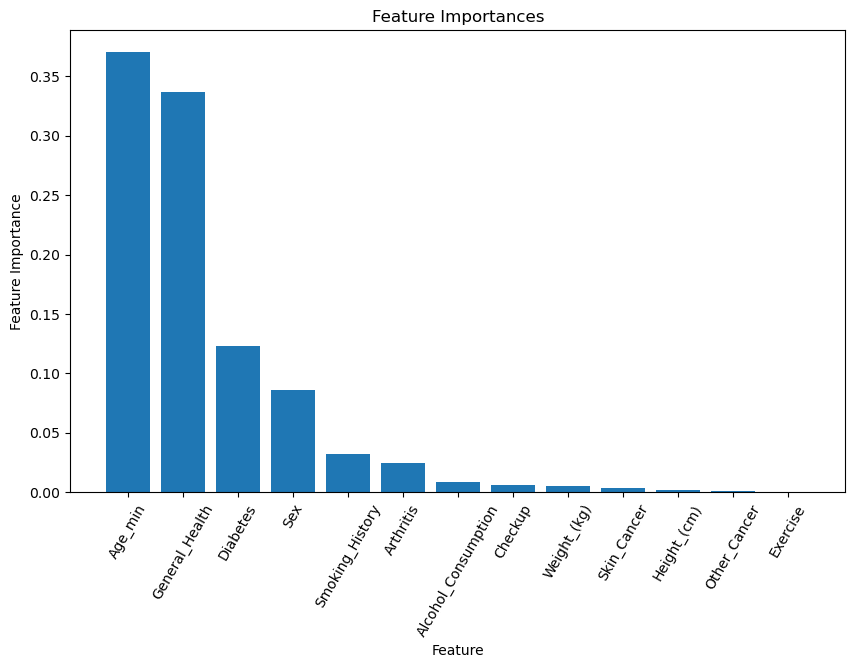

In [83]:
base_estimator = GradientBoostingClassifier()

# Created SelectFromModel with the base estimator
sfm = SelectFromModel(base_estimator)

X_train_sfm = sfm.fit_transform(X_train, y_train)

# Accessed the underlying model (GradientBoostingClassifier)
gb_model = sfm.estimator_

# Got feature importances and calculated the ranking
feature_importances = gb_model.feature_importances_
ranking = np.argsort(feature_importances)[::-1]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[ranking], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[ranking], rotation=60)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

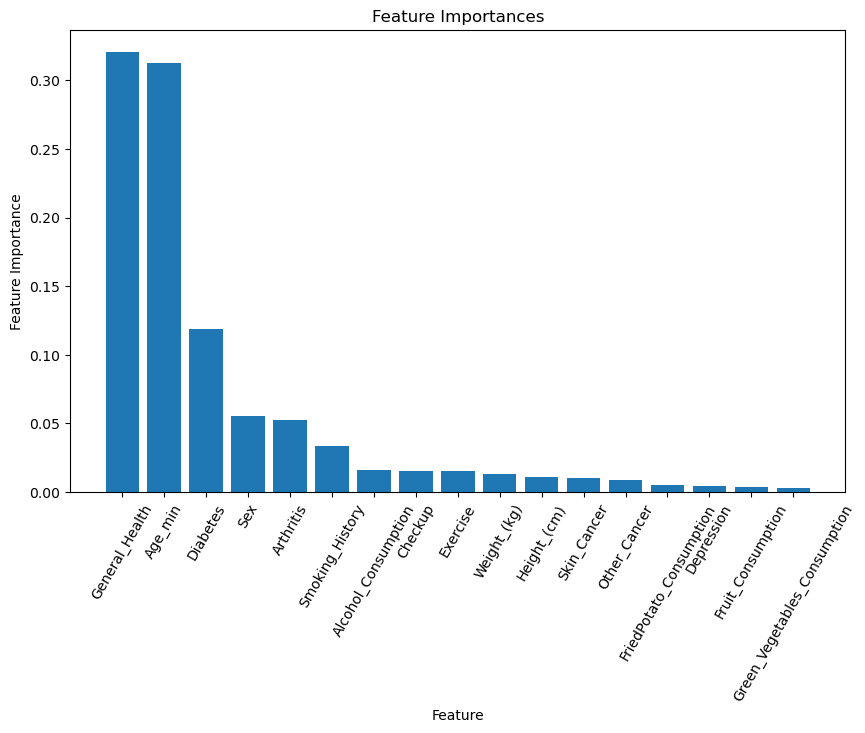

In [78]:
base_estimator = GradientBoostingClassifier(loss="exponential", n_estimators=100, learning_rate=0.1, max_depth=4, min_samples_leaf=5, max_features='log2', subsample=0.8)

# Created SelectFromModel with the base estimator
sfm = SelectFromModel(base_estimator)

X_train_sfm = sfm.fit_transform(X_train, y_train)

# Accessed the underlying model (GradientBoostingClassifier)
gb_model = sfm.estimator_

# Got feature importances and calculated the ranking
feature_importances = gb_model.feature_importances_
ranking = np.argsort(feature_importances)[::-1]

# Ploting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[ranking], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[ranking], rotation=60)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

In [80]:
columns= data_train_normal.columns
print(columns)

data_train_normal = data_train_normal.drop(columns=["FriedPotato_Consumption" , "Green_Vegetables_Consumption", 
                                                    "Fruit_Consumption" , "Depression"])

columns= data_train_normal.columns
print(columns)

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Height_(cm)', 'Weight_(kg)', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'Age_min'],
      dtype='object')


In [82]:
X = data_train_normal.drop(['Heart_Disease'], axis=1)
y = data_train_normal['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model=GradientBoostingClassifier()
gb_clf = GradientBoostingClassifier(  loss="exponential" , n_estimators=100 , learning_rate=0.1, max_depth=4, min_samples_leaf=5, 
                                    max_features ='log2' , subsample=0.8 )

gb_clf_1 = GradientBoostingClassifier(  loss="exponential", n_estimators=50 , learning_rate=0.1, max_depth=3, min_samples_split=2
                                    ,min_samples_leaf=2,  max_features ='sqrt' , subsample=0.9 )

testing(model)
testing(gb_clf)
testing(gb_clf_1)

0.9213421832193689
++++++++++
0.9212931821725283
++++++++++
0.9210927233445443
++++++++++


#### the accuracy still hasnt imporoved after removing less important features so it is better to keep all features rather than remove them

### Applying Voting based Classifier in ensamble learning as the model

In [37]:
# final model for classification of data with normal values of dataset
# creatring a voting classfier that combines a Gradient Boosting classifier, XGBoost classifier, and Logistic Regression classifier
# it gives a maximum accuracy of 92.17 under different parameters of gradient boosting classifiers and logistic regression
# soft voting gives less accuracy score then hard voting
# the parameters taken are the most optimal for the model
import pickle
X = data1.drop(['Heart_Disease'], axis=1)
y = data1['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lr_clf = LogisticRegression(solver= 'lbfgs' , max_iter=1000)

voting_clf_hard_1 = VotingClassifier(estimators=[('gb', gb_clf), ('xgb', xgb_clf), ('lr', lr_clf)], voting='soft')

voting_clf_hard_1.fit(X_train, y_train)

with open('trained_model.pkl', 'wb') as model_file:
        pickle.dump(voting_clf_hard_1, model_file)

y_pred_hard = voting_clf_hard_1.predict(X_test)

accuracy_hard = accuracy_score(y_test, y_pred_hard)
print("Voting Classifier (Hard) Accuracy:", accuracy_hard*100)

Voting Classifier (Hard) Accuracy: 92.16544443145182


Classification Report for data with normal values of diabetes:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55147
           1       0.54      0.04      0.07      4716

    accuracy                           0.92     59863
   macro avg       0.73      0.52      0.52     59863
weighted avg       0.89      0.92      0.89     59863



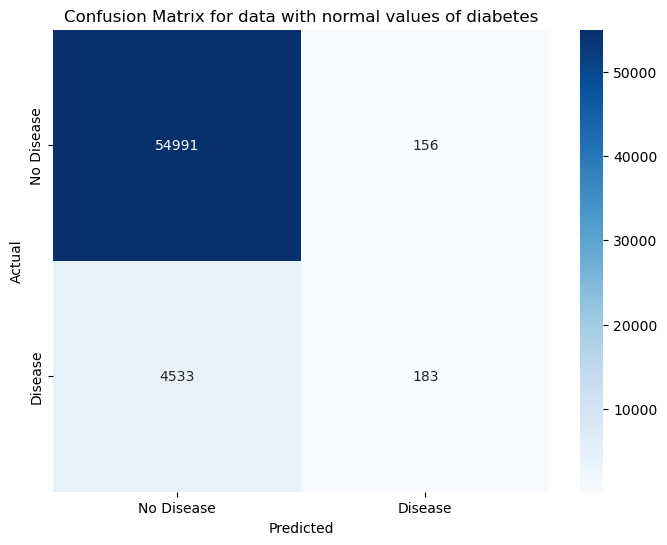

In [45]:
print("Classification Report for data with normal values of diabetes:")
print(classification_report(y_test, y_pred_hard))

cm = confusion_matrix(y_test, y_pred_hard)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for data with normal values of diabetes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
# final model for classification of data with abnormal values of diabetes
X = data2.drop(['Heart_Disease'], axis=1)
y = data2['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lr_clf = LogisticRegression(solver= 'lbfgs' , max_iter=1000)

voting_clf_hard_2 = VotingClassifier(estimators=[('gb', gb_clf), ('xgb', xgb_clf), ('lr', lr_clf)], voting='soft')

voting_clf_hard_2.fit(X_train, y_train)




y_pred_hard = voting_clf_hard_2.predict(X_test)

accuracy_hard = accuracy_score(y_test, y_pred_hard)
print("Voting Classifier (soft) Accuracy:", accuracy_hard*100)

Voting Classifier (soft) Accuracy: 91.96224765666737


Classification Report for data with abnormal values of diabetes:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.54      0.04      0.08      4997

    accuracy                           0.92     61771
   macro avg       0.73      0.52      0.52     61771
weighted avg       0.89      0.92      0.89     61771



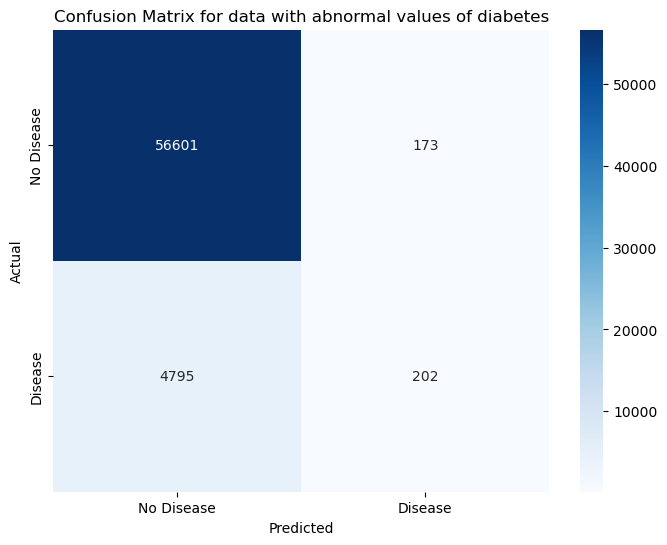

In [43]:
print("Classification Report for data with abnormal values of diabetes:")
print(classification_report(y_test, y_pred_hard))

cm = confusion_matrix(y_test, y_pred_hard)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for data with abnormal values of diabetes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()